In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import accuracy_score
from sklearn.preprocessing   import StandardScaler

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier

In [25]:
df = pd.read_csv("C:/Users/ISD/Python_ali/fault_detection/Pv_Data2.csv")
df;
X = df.drop(['Target'],axis=1).values

Y=df.loc[:,'Target']
X.shape

(1600, 7)

In [26]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2,random_state=42)

In [27]:
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)

In [35]:
model = RandomForestClassifier(n_estimators=40, max_depth=13, criterion='entropy' ,random_state=0)

In [36]:
model.fit(trainX,trainY);

In [37]:
ypred=model.predict(trainX)

In [38]:
c=accuracy_score(trainY,ypred)*100
c

99.140625

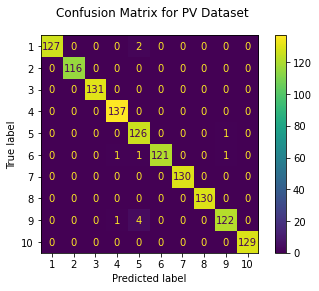

In [39]:
fig = plot_confusion_matrix(model,trainX,trainY, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [40]:
ypred1=model.predict(testX)

In [41]:
c1=accuracy_score(testY,ypred1)*100
c1

71.5625

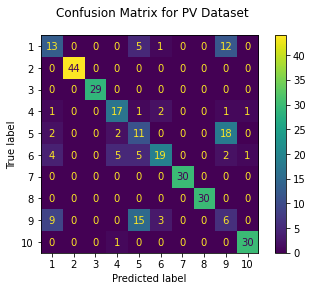

In [42]:
fig = plot_confusion_matrix(model,testX,testY, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [43]:
YR=np.concatenate((trainY,testY),axis=0)

In [44]:
YP = np.concatenate((ypred,ypred1), axis=0)

In [45]:
ac2=accuracy_score(YR,YP)*100
ac2

93.625

In [46]:
c2=confusion_matrix(YR,YP)
c2

array([[140,   0,   0,   0,   7,   1,   0,   0,  12,   0],
       [  0, 160,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 160,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0, 154,   1,   2,   0,   0,   1,   1],
       [  2,   0,   0,   2, 137,   0,   0,   0,  19,   0],
       [  4,   0,   0,   6,   6, 140,   0,   0,   3,   1],
       [  0,   0,   0,   0,   0,   0, 160,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 160,   0,   0],
       [  9,   0,   0,   1,  19,   3,   0,   0, 128,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   0, 159]], dtype=int64)